In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [101]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [87]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


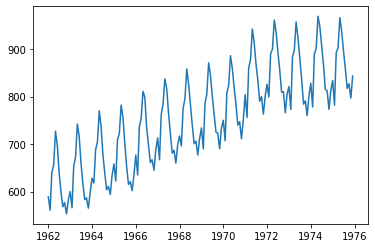

In [88]:
plt.plot(milk)

In [89]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [137]:
sm.__version__

'0.11.0'

In [102]:
milk.milk = milk.milk.values/ milk.index.days_in_month
milk

,milk
month,
1962-01-01,19.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,27.233333
1975-10-01,26.677419


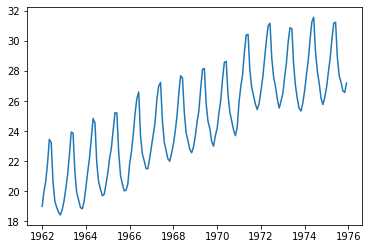

In [103]:
plt.plot(milk)

In [92]:
sum(milk.milk)

4166.326661899464

In [104]:
milk['milk_diff'] = milk.milk - milk.milk.shift(1) 
milk

,milk,milk_diff
month,,
1962-01-01,19.000000,NaN
1962-02-01,20.035714,1.035714
1962-03-01,20.645161,0.609447
1962-04-01,21.866667,1.221505
1962-05-01,23.451613,1.584946
...,...,...
1975-08-01,27.677419,-1.225806
1975-09-01,27.233333,-0.444086
1975-10-01,26.677419,-0.555914


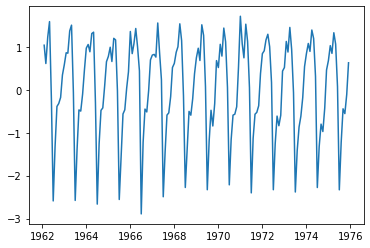

In [105]:
plt.plot(milk.milk_diff)

In [106]:
sm.tsa.stattools.adfuller(milk.milk_diff.dropna())

(-2.7594694762289365,
 0.06430054654174293,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [107]:
milk['milk_diff12'] = milk.milk - milk.milk.shift(12) 

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

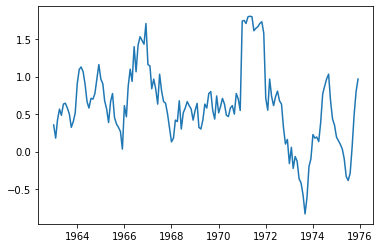

In [109]:
plt.plot(milk.milk_diff12)
sm.tsa.stattools.adfuller(milk.milk_diff12.dropna())

In [112]:
milk['milk_diff12_1'] = milk.milk_diff12 - milk.milk_diff12.shift(1) 

(-5.481326334796932,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

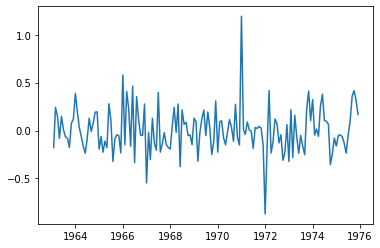

In [113]:
plt.plot(milk.milk_diff12_1)
sm.tsa.stattools.adfuller(milk.milk_diff12_1.dropna())

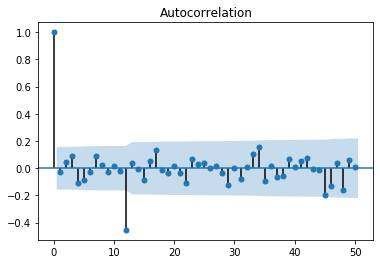

In [123]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.milk_diff12_1.dropna().values.squeeze(), lags=50);

In [130]:
sm.__version__

'0.11.0'

TypeError: 'NoneType' object is not callable

<Figure size 1080x504 with 0 Axes>

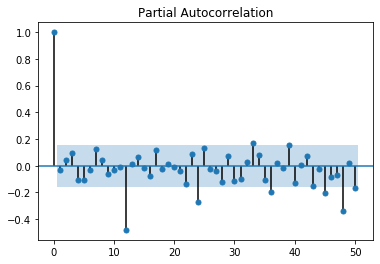

In [136]:
plt.figure(figsize=(15,7))
sm.graphics.tsa.plot_pacf(milk.milk_diff12_1.dropna().values.squeeze(), lags=50)
plt.grid()